#Campus Recruitment Prediction With Machine Learning for MBA Students


 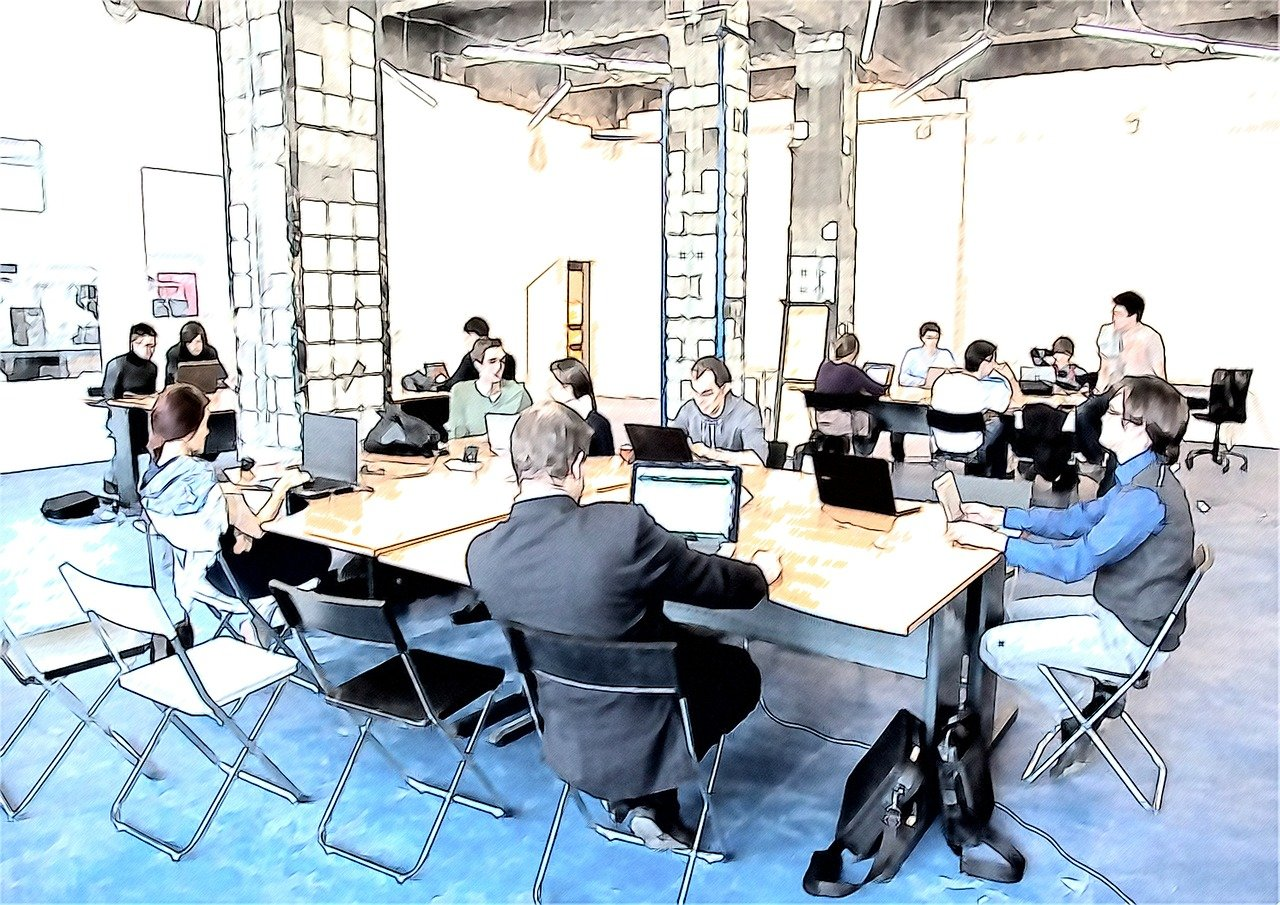

**Student Name:** Kulasooriya K.S.P.<br>
**Registration Number:** EG/2020/4329<br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [ ]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.model_selection import train_test_split

import missingno as msno

## Data Loading

In [ ]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

df = pd.read_csv('/Placement_Data_Full_Class.csv')

# Print the first five rows of the loaded dataframe

df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

df = df.drop('sl_no', axis=1)

## Exploratory Data Analysis (EDA)

In [ ]:
# Identify the shape of the loaded dataframe

print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (215, 14)


In [ ]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**

Categorical Features:<br>
gender , ssc_b , hsc_b , hsc_s , degree_t , workex , specialisation , status

Numerical Features:<br>
ssc_p , hsc_p , degree_p , etest_p , mba_p , salary

In [ ]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

descrip_stats = df.describe()

print(descrip_stats)

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**
To avoid data leakage and ensure the validity of the visualizations.<br>
Because if the the entire dataset is used for visualizing, including the test set, there is a risk of introducing bias into the analysis. It happens because the test set represents unseen data that the model has not been trained on

In [ ]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

train, test = train_test_split(df, test_size=0.2, random_state=42)
test_pred = test.copy()

x_train = train.drop(columns=['salary','status'])
y_test = test['status']

x_test = test.drop(columns=['salary','status'])
y_train = train['status']



In [ ]:
# Print number of training data points

len(train)

172

In [ ]:
# Print number of testing data points

len(test)

43

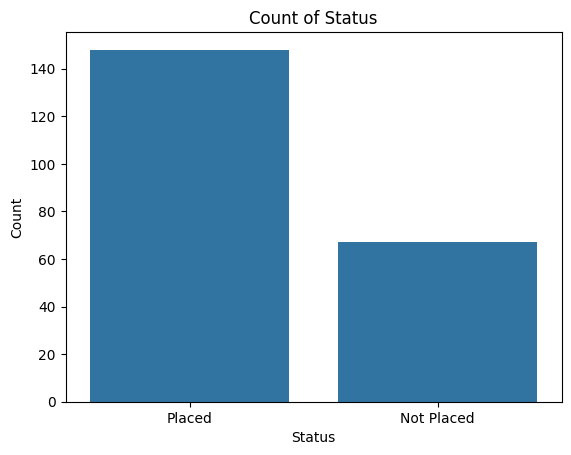

In [ ]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.countplot(data=df, x='status')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Status')

plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
Yes, based on the counts obtained from the plot ('Placed' = 140 and 'Not Placed' = 60), it's evident that the dataset is imbalanced as  one class significantly outnumbers the other.<br>
1. Bias Towards Majority Class <br>
2. Poor Generalization <br>
3. Evaluation Metrics can be Misleading <br>



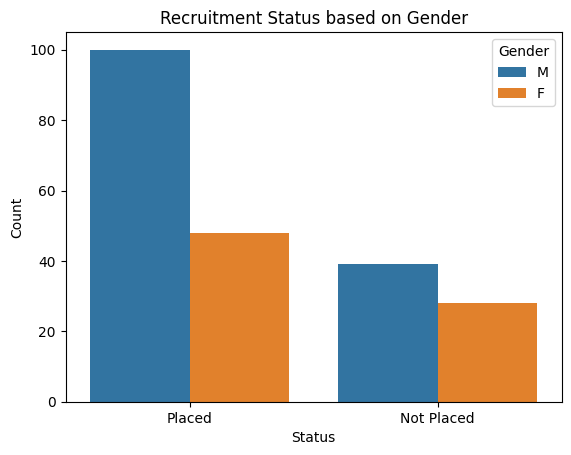

In [ ]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

sns.countplot(data=df, x='status', hue='gender')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Recruitment Status based on Gender')

plt.legend(title='Gender')
plt.show()

**Q:** Explain the observation from the above table.
> **A:**<br>

The majority of both male and female candidates are placed, with more males placed (100) compared to females (50). <br>

However, there are also more males not placed (40) compared to females (30). But there appears to be a gender bias in placement, with more males being placed compared to females. <br>

The overall placement rate seems relatively high, as the number of placed candidates is significantly higher than the number of not placed candidates for both genders.

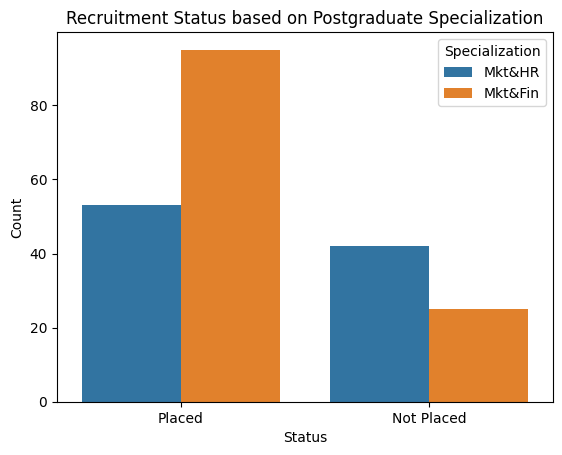

In [ ]:
# Plot the recruiment status of the population based on the post gradute specialisation

sns.countplot(data=df, x='status', hue='specialisation')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Recruitment Status based on Postgraduate Specialization')

plt.legend(title='Specialization')
plt.show()

**Q:** Inteprete the above results.
> **A:**<br>
Candidates with a specialization in Marketing and Finance (Mkt&Fin) have a higher placement rate compared to those with a specialization in Marketing and HR (Mkt&HR), as among candidates with a specialization in Mkt&Fin, a higher proportion (out of total Mkt&Fin) were placed compared to those with a specialization in Mkt&HR.

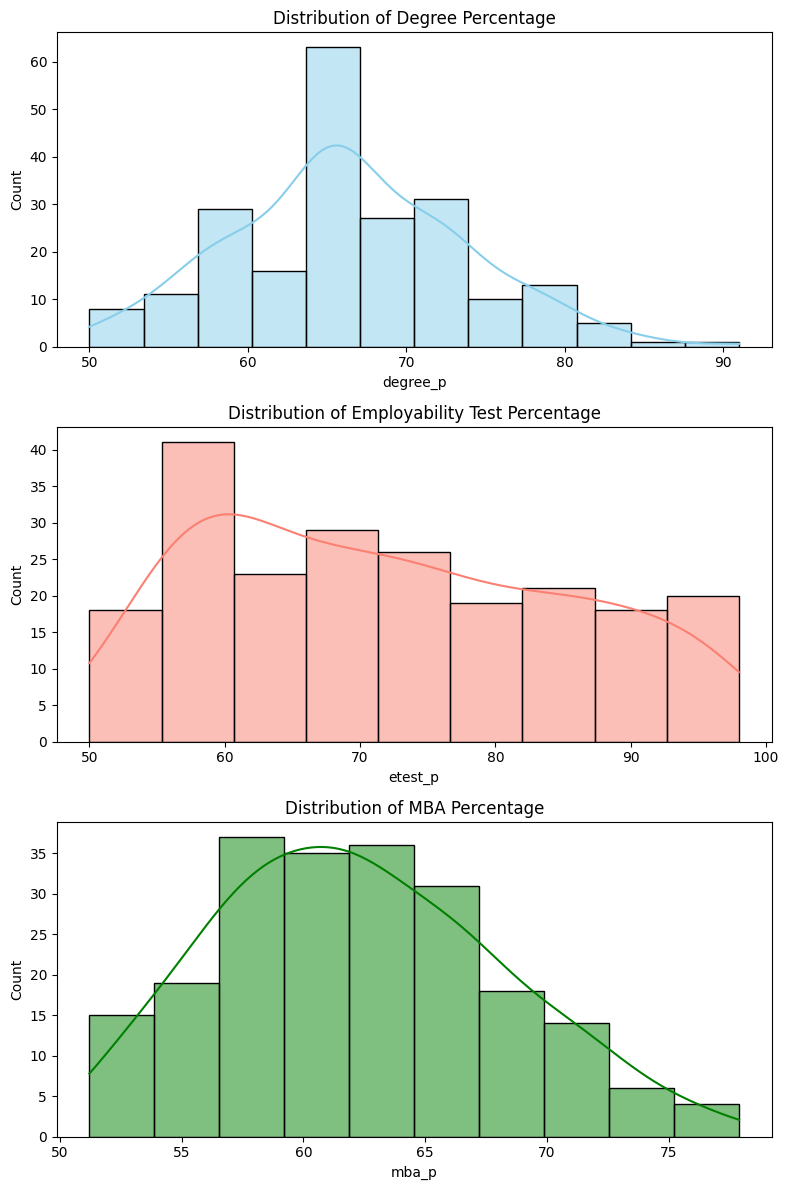

In [ ]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

sns.histplot(data=df, x='degree_p', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Degree Percentage')

sns.histplot(data=df, x='etest_p', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Employability Test Percentage')

sns.histplot(data=df, x='mba_p', kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of MBA Percentage')

plt.tight_layout()
plt.show()


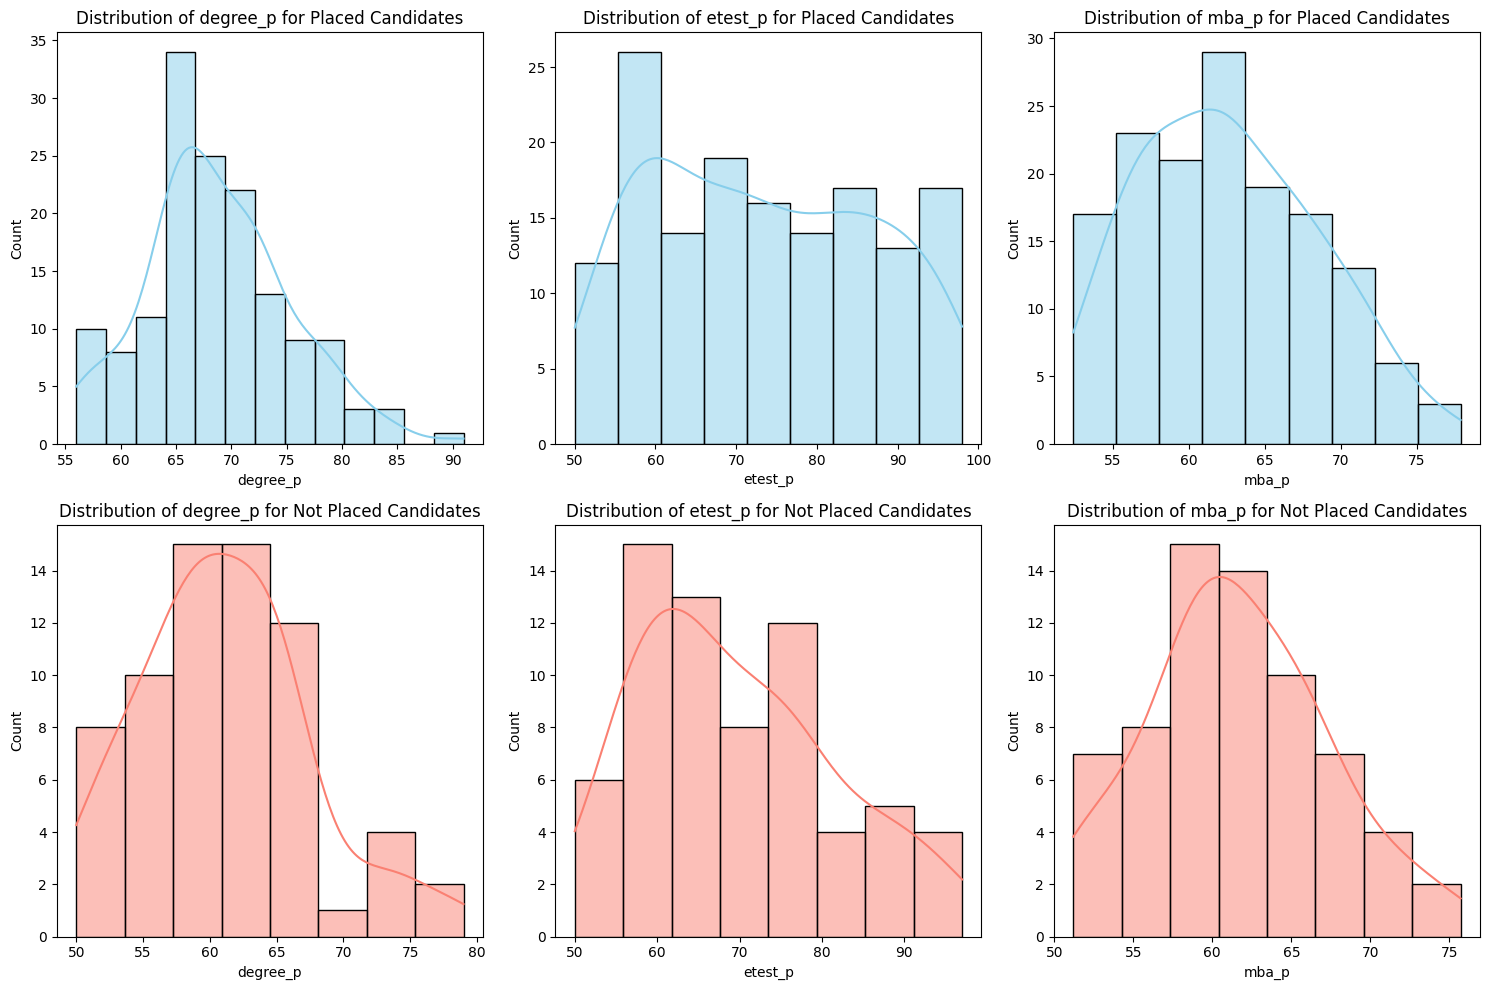

In [ ]:
# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

columns = ['degree_p', 'etest_p', 'mba_p']

for i, col in enumerate(columns):
    sns.histplot(data=df[df['status'] == 'Placed'], x=col, kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Distribution of {col} for Placed Candidates')

    sns.histplot(data=df[df['status'] == 'Not Placed'], x=col, kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Distribution of {col} for Not Placed Candidates')

plt.tight_layout()
plt.show()

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**<br>
The variations of 'Placed' and 'Not PLaced' plots shows similar trends.
The distribution of degree percentages shows a normal distribution centered around 65% with a clear peak, the distribution of Employability Test percentages seems like a uniform distribution, and the distribution of MBA percentages shows a wider spread of values.

In [ ]:
# Check for the null values in train set

null_values_train = train.isnull().sum()
print("Null values in train set:\n", null_values_train)

Null values in train set:
 gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            55
dtype: int64


In [ ]:
# Check for the null values in test set

null_values_test = test.isnull().sum()
print("Null values in test set:\n", null_values_test)

Null values in test set:
 gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            12
dtype: int64


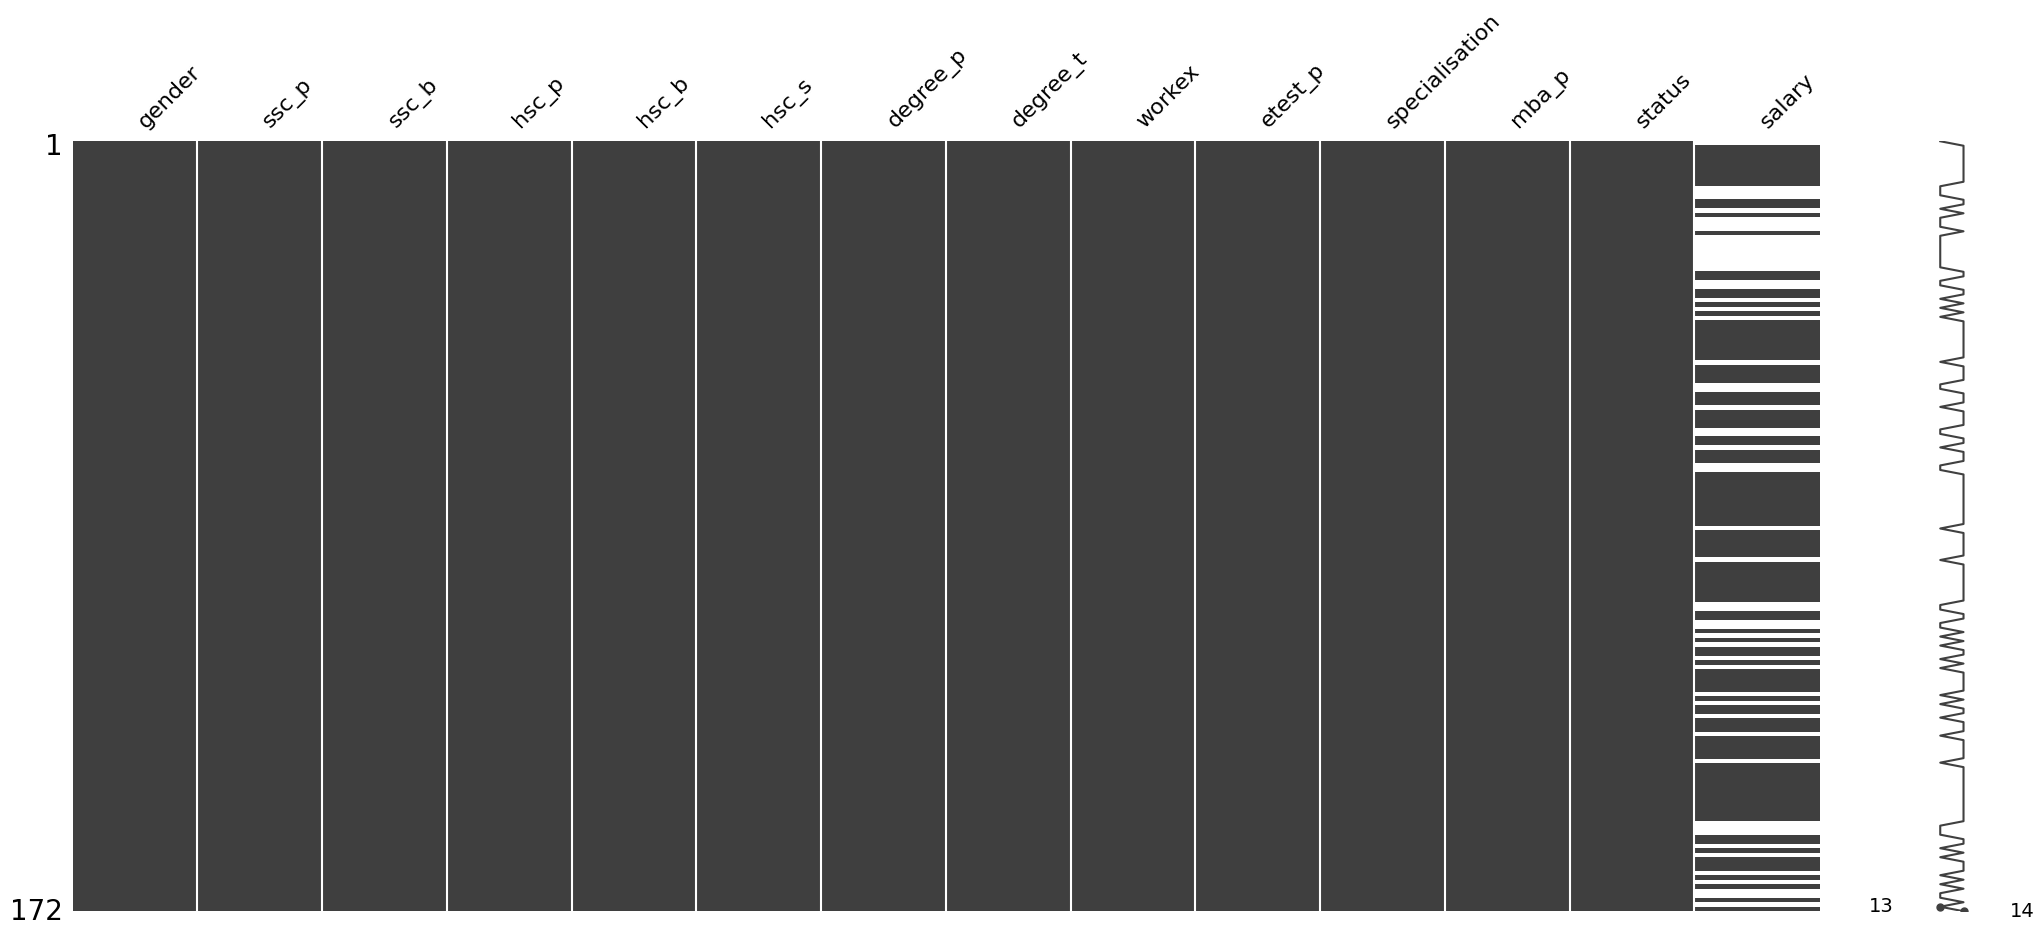

In [ ]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

msno.matrix(train)

plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:** <br>
Removing the 'Salary' column as all the missing values are located in it. The facts that "Salary' has a large number of missing values and it being not affected to the dependant variable ('Status') are important in considering above method.


In [ ]:
# Handle the missing data

train = train.drop('salary', axis=1)

In [ ]:
# Test the training dataset after processing the null values

null_values_train = train.isnull().sum()
print("Null values in train set:\n", null_values_train)

Null values in train set:
 gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64


In [ ]:
# Process the null values in the test set

test = test.drop('salary', axis=1)

In [ ]:
# Test the testing dataset after processing the null values

null_values_test = test.isnull().sum()
print("Null values in test set:\n", null_values_test)

Null values in test set:
 gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**<br>
One-hot encoding is suitable as all categorical features with no ordinal relationship between categories, and as categorical features have very less number of unique categories.

In [ ]:
# Hint: Use Scikit-Learn library for the feature encoding

from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

# List the categorical features
categorical_features = x_train.select_dtypes(include=['object']).columns

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Encode the training features

x_train_encoded = encoder.fit_transform(x_train)
transformed_feature_names =  list(encoder.named_transformers_['cat'].get_feature_names_out(categorical_features))
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=transformed_feature_names)
x_train_encoded_df.head(10)

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Check the datatypes of the the Pandas dataframe after the transformation

x_train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender_F                172 non-null    float64
 1   gender_M                172 non-null    float64
 2   ssc_b_Central           172 non-null    float64
 3   ssc_b_Others            172 non-null    float64
 4   hsc_b_Central           172 non-null    float64
 5   hsc_b_Others            172 non-null    float64
 6   hsc_s_Arts              172 non-null    float64
 7   hsc_s_Commerce          172 non-null    float64
 8   hsc_s_Science           172 non-null    float64
 9   degree_t_Comm&Mgmt      172 non-null    float64
 10  degree_t_Others         172 non-null    float64
 11  degree_t_Sci&Tech       172 non-null    float64
 12  workex_No               172 non-null    float64
 13  workex_Yes              172 non-null    float64
 14  specialisation_Mkt&Fin  172 non-null    fl

In [ ]:
# Encode the testing features

categorical_features = x_test.select_dtypes(include=['object']).columns


encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

x_test_encoded = encoder.fit_transform(x_test)
transformed_feature_names =  list(encoder.named_transformers_['cat'].get_feature_names_out(categorical_features))
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=transformed_feature_names)
x_test_encoded_df.head(10)

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
x_test_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender_F                43 non-null     float64
 1   gender_M                43 non-null     float64
 2   ssc_b_Central           43 non-null     float64
 3   ssc_b_Others            43 non-null     float64
 4   hsc_b_Central           43 non-null     float64
 5   hsc_b_Others            43 non-null     float64
 6   hsc_s_Commerce          43 non-null     float64
 7   hsc_s_Science           43 non-null     float64
 8   degree_t_Comm&Mgmt      43 non-null     float64
 9   degree_t_Others         43 non-null     float64
 10  degree_t_Sci&Tech       43 non-null     float64
 11  workex_No               43 non-null     float64
 12  workex_Yes              43 non-null     float64
 13  specialisation_Mkt&Fin  43 non-null     float64
 14  specialisation_Mkt&HR   43 non-null     floa

In [ ]:
# Encode the target variable in train and test sets

y_train_encoded = pd.get_dummies(y_train, columns=['status'])
y_train_encoded['Placed'] = y_train_encoded['Placed'].astype(int)

y_test_encoded = pd.get_dummies(y_test, columns=['status'])
y_test_encoded['Placed'] = y_test_encoded['Placed'].astype(int)

In [ ]:
# Print the encoded labels for the training set

y_train_encoded.head()

,Not Placed,Placed
93,1,0
84,0,1
95,0,1
137,0,1
210,0,1


In [ ]:
y_test_encoded.head()

,Not Placed,Placed
200,0,1
212,0,1
138,0,1
176,0,1
15,0,1


### Scale the Numerical Features

In [ ]:
# Standard Scale the numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_numerical_data = x_train.select_dtypes(include=['float64', 'int64'])
test_numerical_data = x_test.select_dtypes(include=['float64', 'int64'])

x_train_num = scaler.fit_transform(train_numerical_data)
x_test_num = scaler.transform(test_numerical_data)

train_numerical_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
test_numerical_cols = x_test.select_dtypes(include=['float64', 'int64']).columns

x_train_df = pd.DataFrame(x_train_num, columns=train_numerical_cols)
x_test_df = pd.DataFrame(x_test_num, columns=test_numerical_cols)

In [ ]:
# Display the head of the scaled training set
x_train_df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,-1.394730,-0.354257,-1.601854,-0.051326,-1.151702
1,0.262928,-0.266971,0.517889,-1.326412,-0.038470
2,0.539205,1.042309,-0.144531,1.708292,-0.011442
3,-0.013348,-0.266971,0.782857,-1.251407,-0.307065
4,1.239105,1.391451,1.524767,1.373770,2.071433


In [ ]:
# Display the head of the scaled testing set
x_test_df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0.170836,-0.528828,-0.144531,1.115002,-1.590913
1,-0.013348,0.082170,0.915341,-1.026392,1.265649
2,1.368034,-0.179686,0.915341,1.748795,1.611950
3,-0.750085,-0.528828,-1.336886,-1.326412,-0.731073
4,-0.197532,0.780453,0.385405,-0.051326,0.410877


In [ ]:
# Concatenate all the numarical and categoriacal colums

droping_cols = ['gender_F', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Others', 'workex_No', 'specialisation_Mkt&HR']

X_encoded_train_cat= x_train_encoded_df.drop(droping_cols, axis=1)
X_train = pd.concat([x_train_df,X_encoded_train_cat],axis=1)
X_train.head()
X_train.info()

X_encoded_test_cat= x_test_encoded_df.drop(droping_cols, axis=1)
X_test = pd.concat([x_test_df,X_encoded_test_cat],axis=1)
X_test.head()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ssc_p                   172 non-null    float64
 1   hsc_p                   172 non-null    float64
 2   degree_p                172 non-null    float64
 3   etest_p                 172 non-null    float64
 4   mba_p                   172 non-null    float64
 5   gender_M                172 non-null    float64
 6   ssc_b_Central           172 non-null    float64
 7   hsc_b_Central           172 non-null    float64
 8   hsc_s_Arts              172 non-null    float64
 9   hsc_s_Commerce          172 non-null    float64
 10  hsc_s_Science           172 non-null    float64
 11  degree_t_Comm&Mgmt      172 non-null    float64
 12  degree_t_Sci&Tech       172 non-null    float64
 13  workex_Yes              172 non-null    float64
 14  specialisation_Mkt&Fin  172 non-null    fl

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br>
SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling algorithm used to address class imbalance in machine learning datasets.<br>
> **A2 (Advantage):**<br>
SMOTE reduces the risk of overfitting and can lead to better generalization performance of the machine learning model.
SMOTE helps to alleviate some of the problems associated with class imbalance, such as biased classifiers and poor performance on the minority class.



In [ ]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)


AttributeError: 'DataFrame' object has no attribute 'argmax'

NameError: name 'y_train_resampled' is not defined

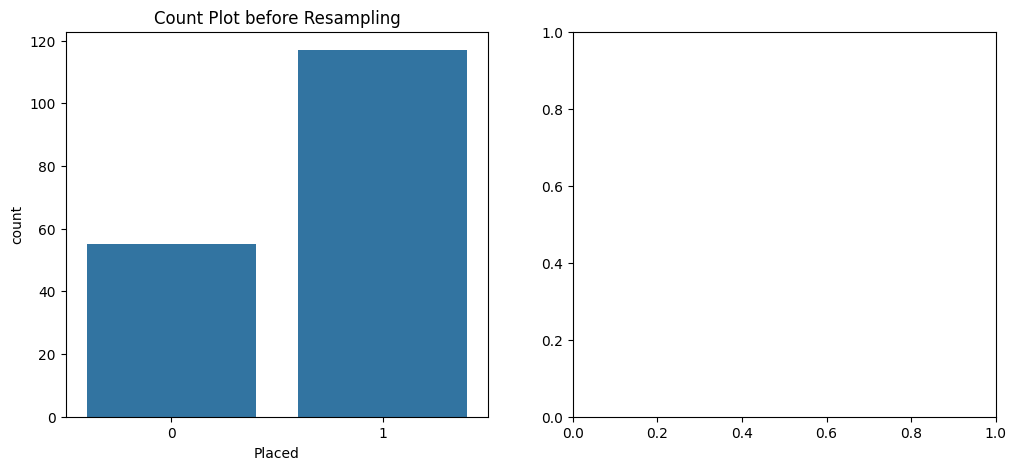

In [ ]:
# plot the count plots side by side before and after resampling

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=y_train_encoded, x='Placed')
plt.title("Count Plot before Resampling")

plt.subplot(1, 2, 2)
sns.countplot(data=y_train_resampled, x='Placed')
plt.title("Count Plot after Resampling")

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**<br>
No, typically we do not oversample the testing set.

The purpose of oversampling techniques like SMOTE is to address class imbalance in the training data, thereby improving the performance of machine learning models by providing them with a more balanced dataset to learn from. However, the testing set should ideally reflect the real-world distribution of classes, and oversampling it could introduce biases and inaccuracies in the evaluation of the model's performance.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [ ]:
# Make sure you have loaded the necessary libaries here or in a point before

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling the minority class
    ('classifier', SVC())  # Support Vector Classifier (SVC)
])

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train_encoded.shape)

In [ ]:
# Define stratified k-fold cross validation with five folds

X = X_train.values  # Convert dataframe to array
y = y_train_encoded.values

n_folds = 5

stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
classifier = SVC()

accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train1, X_test1 = X[train_index], X[test_index]
    y_train1, y_test = y[train_index], y[test_index]

    classifier.fit(X_train1, y_train1)

    predictions = classifier.predict(X_test1)

    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / n_folds
print(f'Average Accuracy: {average_accuracy}')

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**<br>
Stratified K-Folds cross-validation is an important technique used in machine learning for evaluating the performance of models, particularly in scenarios with imbalanced class distributions. It addresses the issue of ensuring that each fold of the cross-validation retains the same class distribution as the original dataset

In [ ]:
# Define parameter grid with two to three hyper parameters to perform grid search

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [ ]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

grid_search = GridSearchCV(classifier, param_grid, cv=5)

In [ ]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

grid_search.fit(X_train, y_train_encoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [ ]:
# Print the mean cross validated score of the best estimator (Accuracy)

print(f"the best estimator Accuracy : {grid_search.best_score_}")

In [ ]:
# Print the best hyper parameters detected from the grid search

print(f"the best estimator Accuracy : {grid_search.best_params_}")

In [ ]:
# Obtain the best estimator selected from the grid search

best_param = grid_search.best_params_

### Model Evaluation

In [ ]:
# Fit the best estimator to the whole training dataset

classifier_new = SVC(**best_param)

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train_encoded.shape)

In [ ]:
# Calculate the accuracy considering the complete traing set

classifier_new.fit(X_train, y_train_encoded)
predictions = classifier_new.predict(X_train)
accuracy = accuracy_score(y_train_encoded, predictions)

print(f'Average Accuracy of train data: {accuracy}')

In [ ]:
X_test.info()

**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**It can be assumed that the model is not overfitting as the train accuracy and the test accuracy does not show a large difference.

In [ ]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

classifier_new.fit(x_test, y_test_encoded)
predictions = classifier_new.predict(x_test)

conf_matrix = confusion_matrix(y_test_encoded, predictions)
print(conf_matrix)

**Q:** Comment about the obtained confusion matrices. <br>
> **A:**

In [ ]:
# Generate the classification report from Scikit-Learn for the test set

classification_rep = classification_report(y_test_encoded, predictions)
print(classification_rep)

**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**<br>
Precision: The accuracy of total positive predictions. Precision for 0.86 for class 0 shows that when the model predicts an instance of class 0, it is correct 86% of the time.

Recall (Sensitivity): Recall measures the proportion of actual positives that were correctly identified by the model. The recall of class 1 is 0.94, meaning that the model is able to identify 94% of the true class 1 instances.

F1-Score: Represents the balance between precision and recall. F1-score varies between 0 and 1. The F1-score for class 0 is 0.97, and for class 1 is 0. Therefore the model is better at identifying class 1 instances than class 0 instances.

In [ ]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Area Under the Curve (AUC): {:.2f}".format(roc_auc))

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**<br>

ROC curve plots the True Positive Rate (TPR - recall or sensitivity) against the False Positive Rate (FPR - probability of false alarm) at different threshold settings.

Area Under the Curve (AUC) value shows the measure of the overall performance of the classification model. A higher AUC value indicates better performance. In this problem, the AUC value is 0.97, which shows the model has a good ability to differentiate between the positive and negative classes.